# CARNEGIE MELLON UNIVERSITY

**Name**: Junxiao Guo

**Andrew ID**: junxiaog

**Course**: DATA, INFERENCE & APPLIED MACHINE LEARNING (COURSE 18-785)

**ASSIGNMENT 3**

In [1]:
%config IPCompleter.greedy=True
# !pip install numpy
# !pip install pandas
# !pip install matplotlib
# !pip install scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import matplotlib.dates as mdates


## Quesiont 1

In [2]:
hypo_mean = 7725
calorie_stat = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
sample_mean,sample_std,sample_ste = np.mean(calorie_stat),np.std(calorie_stat),stats.sem(calorie_stat)
# t_stat,pval = stats.ttest_1samp(calorie_stat,ret_mean)
t_stat = np.abs(sample_mean - hypo_mean) / ((sample_std)/np.sqrt(len(calorie_stat)))
dof = len(calorie_stat)-1
pval =2*(1 - stats.t.cdf(calorie_stat,df=dof))

print("Mean: {}  Standard Deviation: {}   Standard Error of the Mean: {}".format(sample_mean,sample_std,sample_ste))
print("Degrees of Freedom: {}   t-statistic: {}   P Value:{}  ".format(dof,t_stat,pval))
# reject = True if t_stat == pval else False


Mean: 6753.636363636364  Standard Deviation: 1088.9717646166182   Standard Error of the Mean: 344.3631083801271
Degrees of Freedom: 10   t-statistic: 2.9584318175114594   P Value:[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  


### Explanation

- Since the data comes from a normal distribution, and the mean value is about 6753KJ (which is smaller than 7725KJ), a **left tail test** is appropriate.


## Question 2

In [3]:
class Ireland():
    def __init__(self):
        self.sample_size = 42
        self.mean = 74
        self.std = 7.4
class Elsewhere():
    def __init__(self):
        self.sample_size = 61
        self.mean = 57
        self.std = 7.1
        
ire = Ireland()
elsw = Elsewhere()
t, p = scipy.stats.ttest_ind_from_stats(mean1=ire.mean,mean2=elsw.mean,std1=ire.std,std2=elsw.std,nobs1=ire.sample_size,nobs2=elsw.sample_size,equal_var=False)
### With formula
t2 = (ire.mean-elsw.mean)/(np.sqrt((np.power(ire.std,2)/ire.sample_size)+(np.power(elsw.std,2)/elsw.sample_size)))

assert t == t2 , 't score are not the same!'
print("t-score: {} p-value: {}".format(t,p))


 

t-score: 11.647653131319812 p-value: 2.315890162874227e-19


### Explanation

- A **two-sample test** is appropriate since  the GOES of Ireland and Elsewhere are independent to each other.
- A right tail is appropriate since the test is about test if the GOES in Irish pub tastes **significantly better** than elsewhere around the globe.


## Question 3

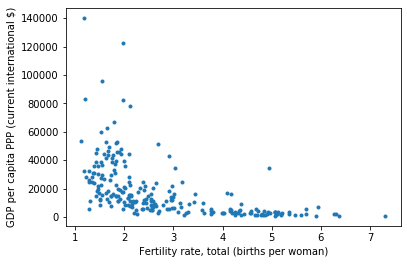

-12938.400509565809


In [4]:
f_gdp = pd.read_csv('API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_151039/API_NY.GDP.PCAP.PP.CD_DS2_en_csv_v2_151039.csv',skiprows=4)
f_fert = pd.read_csv('API_SP.DYN.TFRT.IN_DS2_en_csv_v2_153225/API_SP.DYN.TFRT.IN_DS2_en_csv_v2_153225.csv',skiprows=4)
codeArr = f_gdp['Country Code']
assert list(f_gdp['Country Code']) == list(f_fert['Country Code']), "Country Code doesn't match"
gdp,fertility = f_gdp['2013'],f_fert['2013']
plt.scatter(fertility,gdp,marker='.')
plt.xlabel('Fertility rate, total (births per woman)')
plt.ylabel('GDP per capita PPP (current international $)')
plt.show()
assert len(gdp) == len(fertility), '2013 stat lenght are not the same'

gdp_mean,fert_mean = np.mean(gdp),np.mean(fertility)
gdp_std,fert_std = np.std(gdp),np.std(fertility)
corr_coefficient = (1/(len(gdp)))*np.sum((gdp-gdp_mean)*(fertility-fert_mean))
print(corr_coefficient)

### Explanation

- Correlation Coefficient  = -12938.400509565809

 


## Question 4

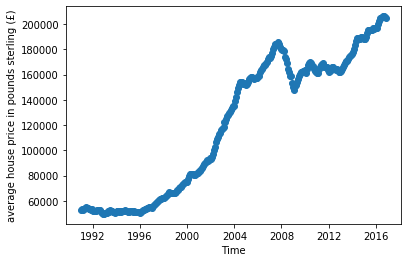

0       53051.721106
1       53496.798746
2       52892.861606
3       53677.435270
4       54385.726747
5       55107.375085
6       54541.121263
7       54040.710150
8       53259.454835
9       53466.620438
10      53018.022496
11      53104.082984
12      51951.198589
13      51850.184753
14      51977.531548
15      51977.833096
16      52712.599600
17      52905.529843
18      52726.864317
19      52311.708838
20      51096.962351
21      50699.394068
22      49601.664241
23      49744.666641
24      50075.486575
25      50374.680861
26      50187.356875
27      51677.239161
28      50901.094775
29      52785.720755
           ...      
281    188902.937514
282    188948.547384
283    189305.834199
284    188374.454370
285    189333.241018
286    189387.811605
287    188558.570535
288    188445.792871
289    187963.553799
290    189453.675282
291    193048.401177
292    195166.061980
293    195055.291164
294    195621.335537
295    195279.056782
296    195585.011303
297    196807

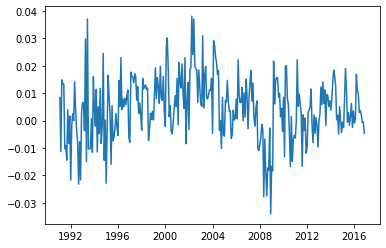

In [9]:
f_monthly = pd.read_excel('monthly.xls',sheet_name='Monthly')
time,price = f_monthly['Unnamed: 0'],f_monthly['Average House Price']
pos = f_monthly.loc[f_monthly['Unnamed: 0'] == '2016-12-01'].index[0]
time,price = time[:pos],price[:pos]
plt.plot_date(time,price)
plt.xlabel("Time")
plt.ylabel("average house price in pounds sterling (£)")
plt.show()

acf = lambda x,y: (x/y)-1
acf_arr = [acf(price[i],price[i-1]) for i in range(1,len(price))]
plt.plot(time.values[1:],acf_arr)
acf_df = pd.DataFrame({'time':time[1:],'acf':acf_arr})
# acf_df.plot.bar(x='time')
# plt.bar(acf_df['time'],acf_df['acf'])
# fig, ax = plt.subplots(figsize=(15,7))
# acf_df.plot(ax=ax)
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())


### Explanation




## Question 5



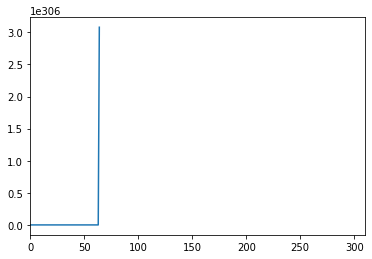

In [8]:
# cumu_ret = np.cumprod(1 + price.values) - 1
# print(cumu_ret)
# plt.plot(time,cumu_ret)
((price + 1).cumprod() - 1).plot()

